In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Getting data

In [ ]:
df = pd.read_csv("../data/CCPM/vmCloud_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   vm_id                      object 
 1   timestamp                  object 
 2   cpu_usage                  float64
 3   memory_usage               float64
 4   network_traffic            float64
 5   power_consumption          float64
 6   num_executed_instructions  float64
 7   execution_time             float64
 8   energy_efficiency          float64
 9   task_type                  object 
 10  task_priority              object 
 11  task_status                object 
dtypes: float64(7), object(5)
memory usage: 183.1+ MB


In [66]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(by='timestamp')
df.columns

Index(['vm_id', 'timestamp', 'cpu_usage', 'memory_usage', 'network_traffic',
       'power_consumption', 'num_executed_instructions', 'execution_time',
       'energy_efficiency', 'task_type', 'task_priority', 'task_status'],
      dtype='object')

In [67]:
df.head()

,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status
454771,a5ee77f0-5a60-474d-8a66-11bf38337326,2023-01-01 00:00:09,63.282078,NaN,212.708467,358.127312,3983.0,45.302997,0.681050,io,high,running
969844,NaN,2023-01-01 00:00:15,30.719806,89.199261,604.263594,325.820755,NaN,3.232369,0.992169,network,high,completed
898414,fe5e04e3-4ea4-48cf-a193-3f58abd147ed,2023-01-01 00:00:31,14.019569,74.367251,600.520958,368.735533,8240.0,50.742393,0.639539,network,medium,waiting
197262,caf092f0-55c3-4486-a295-f04a9a2c6406,2023-01-01 00:00:36,93.148608,68.979072,621.709971,158.018066,2085.0,53.189927,NaN,compute,low,completed
1505883,ca081259-cb36-4c07-a7db-5af5f8676930,2023-01-01 00:00:40,99.077509,71.444353,760.884810,196.374567,792.0,17.032331,0.678037,network,low,waiting


In [68]:
df.isnull().sum()

vm_id                        200638
timestamp                    200666
cpu_usage                    199038
memory_usage                 200510
network_traffic              199481
power_consumption            200271
num_executed_instructions    199686
execution_time               199827
energy_efficiency            200042
task_type                    199962
task_priority                199433
task_status                  200306
dtype: int64

<Axes: >

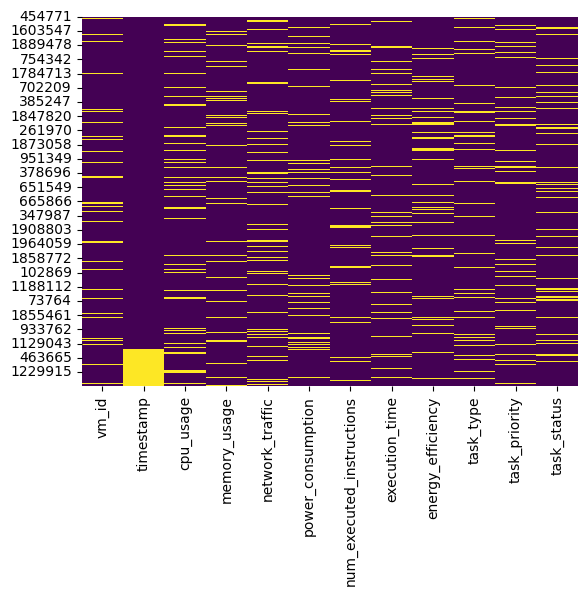

In [69]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [70]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565039 entries, 898414 to 1982766
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   vm_id                      565039 non-null  object        
 1   timestamp                  565039 non-null  datetime64[ns]
 2   cpu_usage                  565039 non-null  float64       
 3   memory_usage               565039 non-null  float64       
 4   network_traffic            565039 non-null  float64       
 5   power_consumption          565039 non-null  float64       
 6   num_executed_instructions  565039 non-null  float64       
 7   execution_time             565039 non-null  float64       
 8   energy_efficiency          565039 non-null  float64       
 9   task_type                  565039 non-null  object        
 10  task_priority              565039 non-null  object        
 11  task_status                565039 non-null  object 

In [90]:
df_num = df.copy()

mapping = {'network': 1, 'compute': 2, 'io': 3}
df_num['task_type'] = df['task_type'].map(mapping)

mapping = {'low': 1, 'medium': 2, 'high': 3}
df_num['task_priority'] = df['task_priority'].map(mapping)

mapping = {'waiting': 1, 'running': 2, 'completed': 3}
df_num['task_status'] = df['task_status'].map(mapping)

df_num = df_num.drop(columns=['vm_id'])#'timestamp', 
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565039 entries, 898414 to 1982766
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   timestamp                  565039 non-null  datetime64[ns]
 1   cpu_usage                  565039 non-null  float64       
 2   memory_usage               565039 non-null  float64       
 3   network_traffic            565039 non-null  float64       
 4   power_consumption          565039 non-null  float64       
 5   num_executed_instructions  565039 non-null  float64       
 6   execution_time             565039 non-null  float64       
 7   energy_efficiency          565039 non-null  float64       
 8   task_type                  565039 non-null  int64         
 9   task_priority              565039 non-null  int64         
 10  task_status                565039 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(3)
memory u

In [93]:
for col in df_num.columns:
    df_num[col] = (df_num[col] - df_num[col].min()) / (df_num[col].max() - df_num[col].min())

df_num.head()

,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status
898414,0.000000e+00,0.140195,0.743673,0.600522,0.737472,0.824082,0.507423,0.639541,0.0,0.5,0.0
1505883,5.195277e-07,0.990780,0.714443,0.760886,0.392750,0.079208,0.170322,0.678039,0.0,0.0,0.0
1189161,2.193561e-06,0.898894,0.057099,0.453162,0.620156,0.840384,0.141461,0.862286,0.0,1.0,0.5
831735,4.906650e-06,0.995141,0.572894,0.672081,0.036683,0.342534,0.141708,0.704595,0.0,0.0,1.0
1477338,7.042486e-06,0.300821,0.982459,0.852146,0.021737,0.670267,0.768262,0.343827,0.5,1.0,0.0


# EDA

In [74]:
df.columns

Index(['vm_id', 'timestamp', 'cpu_usage', 'memory_usage', 'network_traffic',
       'power_consumption', 'num_executed_instructions', 'execution_time',
       'energy_efficiency', 'task_type', 'task_priority', 'task_status'],
      dtype='object')

<Axes: >

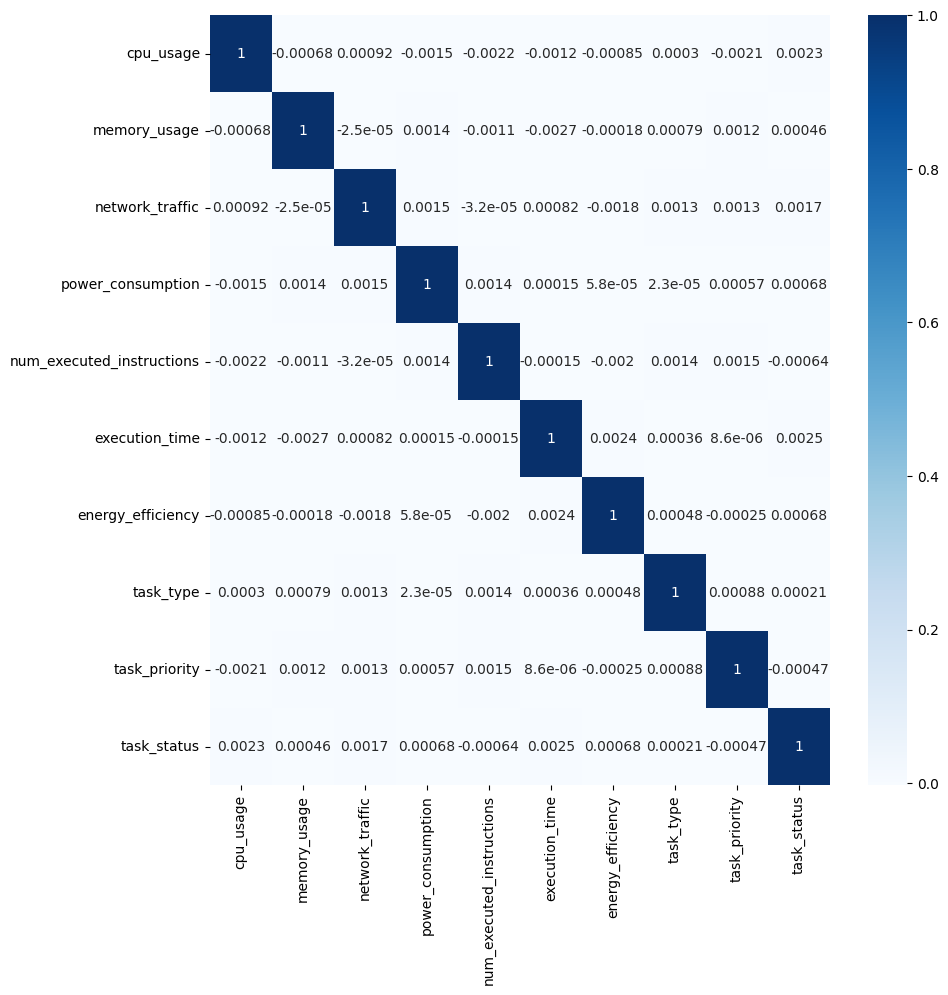

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(df_num.corr(),cbar=True,annot=True,cmap='Blues')

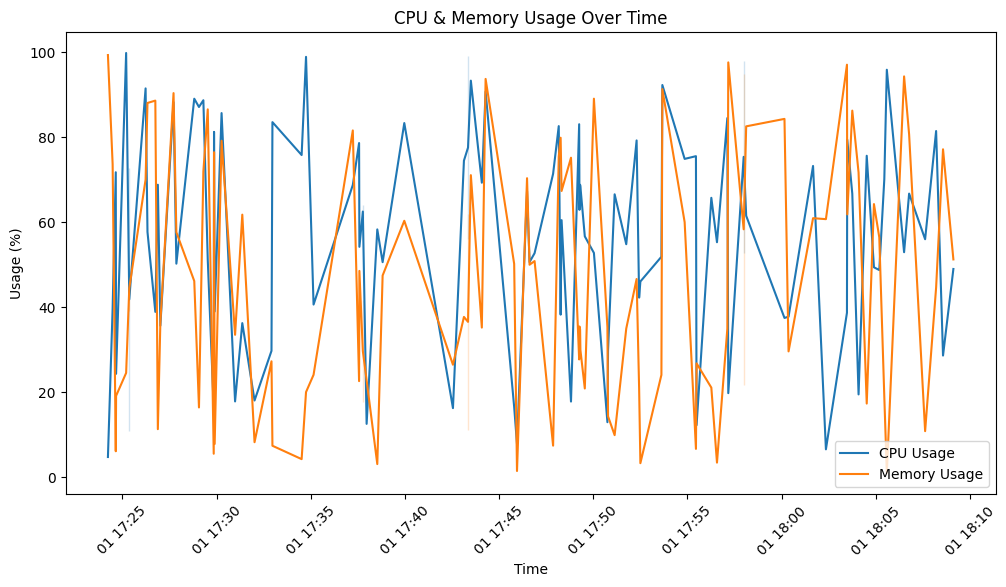

In [95]:
n_samples = 100
t_start = 2000

plt.figure(figsize=(12, 6))
sns.lineplot(data=df[t_start:t_start+n_samples], x='timestamp', y='cpu_usage', label='CPU Usage')
sns.lineplot(data=df[t_start:t_start+n_samples], x='timestamp', y='memory_usage', label='Memory Usage')
plt.xlabel('Time')
plt.ylabel('Usage (%)')
plt.title('CPU & Memory Usage Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

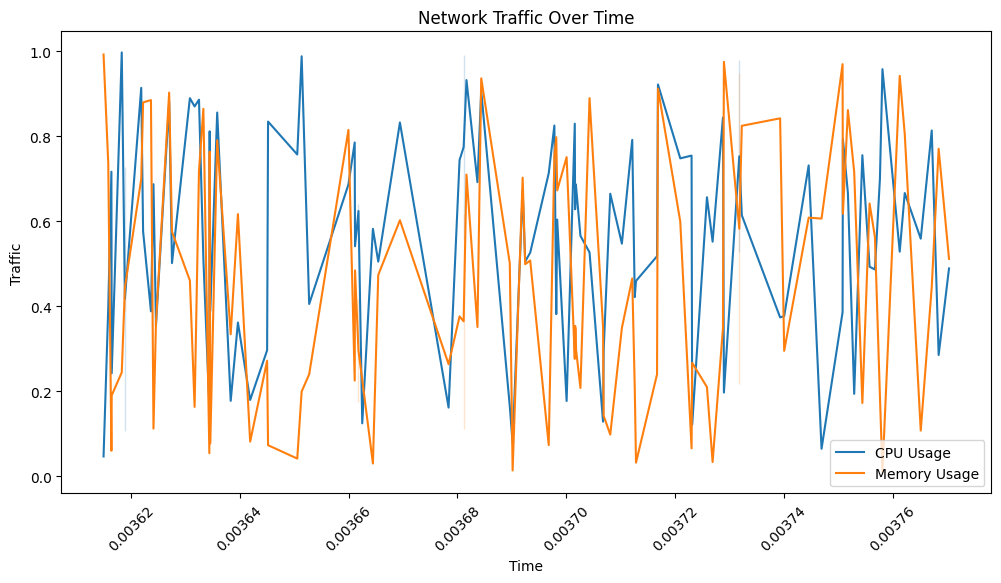

In [99]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_num[t_start:t_start+n_samples], x='timestamp', y='cpu_usage', label='CPU Usage')
sns.lineplot(data=df_num[t_start:t_start+n_samples], x='timestamp', y='memory_usage', label='Memory Usage')
#sns.lineplot(data=df_num[t_start:t_start+n_samples], x='timestamp', y='network_traffic', label='Network Traffic')
plt.xlabel('Time')
plt.ylabel('Traffic')
plt.title('Network Traffic Over Time')
plt.xticks(rotation=45)
plt.show()


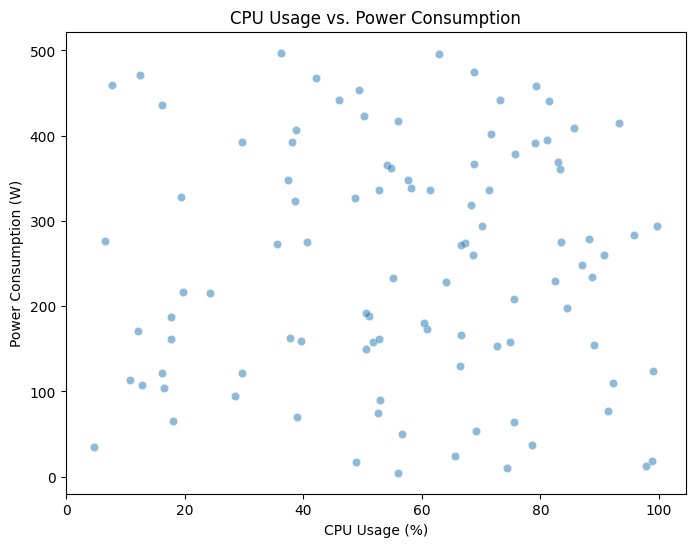

In [101]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df[t_start:t_start+n_samples], x='cpu_usage', y='power_consumption', alpha=0.5)
plt.xlabel('CPU Usage (%)')
plt.ylabel('Power Consumption (W)')
plt.title('CPU Usage vs. Power Consumption')
plt.show()
